In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

#LECTURE DU fichier avec pandas
df=pd.read_csv("titanic-passengers.csv",encoding="iso.8859-1",sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
# on remplace les donnees manquantes par la moyenne
df['Age'].fillna(df['Age'].mean(),inplace=True)
# on remplace les manquantes par la mode pour les colonnes cabin et embarked
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [5]:
#verification
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
# cherchons la correlation entre les elements
df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
from sklearn.metrics import roc_auc_score

# on transforme les elements categorielles de la colonne Survived en numerique
df['Survived']=encoder.fit_transform(df['Survived'])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# selectionnons les fonctionnalites les plus importantes
x=df[['Pclass','Age','SibSp','Fare']]
y=df['Survived']

In [9]:
# separation des donnees en donnees de test et donnees d'entrainement
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)



In [ ]:
# Question 1 Application de la regression logistic
# on cree notre fonction de regression logistic
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [11]:
# mesurons la performence de notre model
print("Accuracy={:.2f}".format(logreg.score(x_test,y_test)))

Accuracy=0.69


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

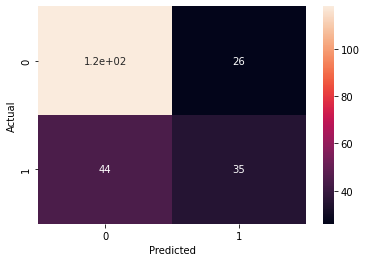

In [12]:
# Question 2 Matrice de confusion
# utilisons maintenant la matrice de confusion
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])
sn.heatmap(confusion_matrix,annot=True)  # pour les axes 'Actual'et 'predicted' 0=no et 1=yes

In [15]:
# mesurons sa performance
Accuracy=(35+12e02)/(35+44+12e2+26)
print("Accuracy=",Accuracy)

Accuracy= 0.946360153256705


In [14]:
# Question 3 ROC/AUC
# on utilise maintenant la matrice roc/auc
auc_roc = roc_auc_score(y_true=y_test, y_score=y_pred)
print(auc_roc)

0.6312412095639943
